# Hits per Channel

This notebook analyses a SAMPIC data file and extracts the hits per channel

## Convert Data
Convert data from SAMPIC binary format to feather/parquet/root

In [1]:
from sampiclyser import SAMPIC_Run_Decoder
from natsort import natsorted
from pathlib import Path

In [2]:
base_path = Path("./data")
run_path = base_path/"Run001_SAMPIC_5_15_2025_22h_25min_Binary"
run_path = base_path/"Run002_SAMPIC_5_15_2025_22h_27min_Binary"
#run_path = base_path/"Run003_SAMPIC_5_15_2025_23h_29min_Binary"
#run_path = base_path/"Run005_SAMPIC_5_16_2025_21h_12min_Binary"
#run_path = base_path/"Run006_SAMPIC_5_17_2025_0h_27min_Binary"
#run_path = base_path/"Run008_SAMPIC_5_17_2025_1h_2min_Binary"
#run_path = base_path/"Run016_SAMPIC_5_17_2025_17h_27min_Binary"
run_files = natsorted(list(run_path.glob("*.bin*")))
print(run_files)

[PosixPath('data/Run002_SAMPIC_5_15_2025_22h_27min_Binary/Run002_SAMPIC_5_15_2025_22h_27min_Binary.bin')]


In [3]:
tmp = SAMPIC_Run_Decoder(run_path)
for file in tmp.run_files:
    with tmp.open_sampic_file_in_chunks_and_get_header(file, 1, debug=True) as (header, _):
        print(len(header))

Run002_SAMPIC_5_15_2025_22h_27min_Binary.bin
1149
1149


In [4]:
tmp = SAMPIC_Run_Decoder(run_path)

for raw_hit in tmp.parse_hit_records(limit_hits=4):
    print(raw_hit)


{'HITNumber': 0, 'UnixTime': 1747340873.8110008, 'Channel': 4, 'Cell': 23, 'TimeStampA': 6094, 'TimeStampB': 6093, 'FPGATimeStamp': 8132615, 'StartOfADCRamp': 117, 'RawTOTValue': -1, 'TOTValue': -1.0, 'PhysicalCell0Time': 81325580.0, 'OrderedCell0Time': 81325573.59375, 'Time': 81325576.17061108, 'Baseline': 0.24507874250411987, 'RawPeak': 0.26572516560554504, 'Amplitude': 0.02064642310142517, 'ADCCounterLatched': 1109, 'DataSize': 64, 'TriggerPosition': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'DataSample': [0.2344609498977661, 0.23569564521312714, 0.2347172349691391, 0.23324590921401978, 0.2323998510837555, 0.23648066818714142, 0.23504529893398285, 0.2382589876651764, 0.23807552456855774, 0.24126526713371277, 0.24209213256835938, 0.24444101750850677, 0.2456800490617752, 0.24904727935791016, 0.25161251425743103, 0.2538869082927704, 0.2

In [5]:
#%%timeit -r 7 -n 5

## Final version
#hit_list = []
#for raw_hit in tmp.parse_hit_records(limit_hits=40):
#    hit_list.append(raw_hit)

In [6]:
#tmp.decode_data(feather_path=Path("./test.feather"), parquet_path=Path("./test.parquet"), root_path=Path("./test.root"))

In [7]:
tmp.decode_data(parquet_path=Path("./Run002.parquet"))

## Set which run to process in subsequent cells

In [8]:
from PPS_TB_May2025_RunDB import runs_to_configs, run_config_info
from PPS_TB_May2025_RunDB import run_info as run_info_dict
run_to_process = "Run001"

parquet_file = Path(f"./{run_to_process}.parquet")

run_info = run_info_dict[run_to_process]
config_key = runs_to_configs[run_to_process]
config_info = run_config_info[config_key]

## Check Decoded Data

In [9]:
import pyarrow as pa
import pandas as pd

In [10]:
#reader = pa.ipc.open_file("test.feather")
#reader.schema

In [11]:
schema = pa.parquet.read_schema(parquet_file, memory_map=True)
schema

HITNumber: int32
UnixTime: double
Channel: int32
Cell: int32
TimeStampA: int32
TimeStampB: int32
FPGATimeStamp: uint64
StartOfADCRamp: int32
RawTOTValue: int32
TOTValue: int32
PhysicalCell0Time: double
OrderedCell0Time: double
Time: double
Baseline: float
RawPeak: float
Amplitude: float
ADCCounterLatched: int32
DataSize: int32
TriggerPosition: list<element: int32>
  child 0, element: int32
DataSample: list<element: float>
  child 0, element: float
-- schema metadata --
pandas: '{"index_columns": [], "column_indexes": [], "columns": [{"name":' + 2471

In [12]:
#df = pd.read_feather(Path("./test.feather"))
#df.tail()

In [13]:
df = pd.read_parquet(parquet_file)
df.tail()

,HITNumber,UnixTime,Channel,Cell,TimeStampA,TimeStampB,FPGATimeStamp,StartOfADCRamp,RawTOTValue,TOTValue,PhysicalCell0Time,OrderedCell0Time,Time,Baseline,RawPeak,Amplitude,ADCCounterLatched,DataSize,TriggerPosition,DataSample
195,195,1.747341e+09,4,9,56521,56520,1045683458,1013,-1,-1,1.045683e+10,1.045683e+10,1.045683e+10,0.241824,0.265739,0.023916,266,64,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...","[0.23505011, 0.2337887, 0.2339166, 0.23133673,..."
196,196,1.747341e+09,4,11,39752,39751,1056021378,149,-1,-1,1.056021e+10,1.056021e+10,1.056021e+10,0.245578,0.264508,0.018931,1141,64,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...","[0.2504241, 0.24809359, 0.24721816, 0.24667418..."
197,197,1.747341e+09,5,10,40899,40898,1146986491,725,-1,-1,1.146986e+10,1.146986e+10,1.146986e+10,0.243748,0.250985,0.007237,1214,64,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...","[0.24322791, 0.24459356, 0.24436194, 0.2437481..."
198,198,1.747341e+09,7,11,48827,48826,1201127155,597,-1,-1,1.201127e+10,1.201127e+10,1.201127e+10,0.249346,0.259001,0.009654,1713,64,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...","[0.23854694, 0.23917343, 0.2404402, 0.241062, ..."
199,199,1.747341e+09,6,11,356,355,1233846686,69,-1,-1,1.233847e+10,1.233847e+10,1.233847e+10,0.244439,0.260288,0.015849,1949,64,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...","[0.23672035, 0.23807593, 0.23791076, 0.2375577..."


## Generic Hits per channel

In [14]:
from sampiclyser.sampic_tools import get_channel_hits, plot_channel_hits

In [15]:
hit_summary = get_channel_hits(parquet_file)
hit_summary

,Channel,Hits
0,0,3
1,1,4
2,2,12
3,3,8
4,4,33
5,5,13
6,6,33
7,7,24
8,8,45
9,9,25


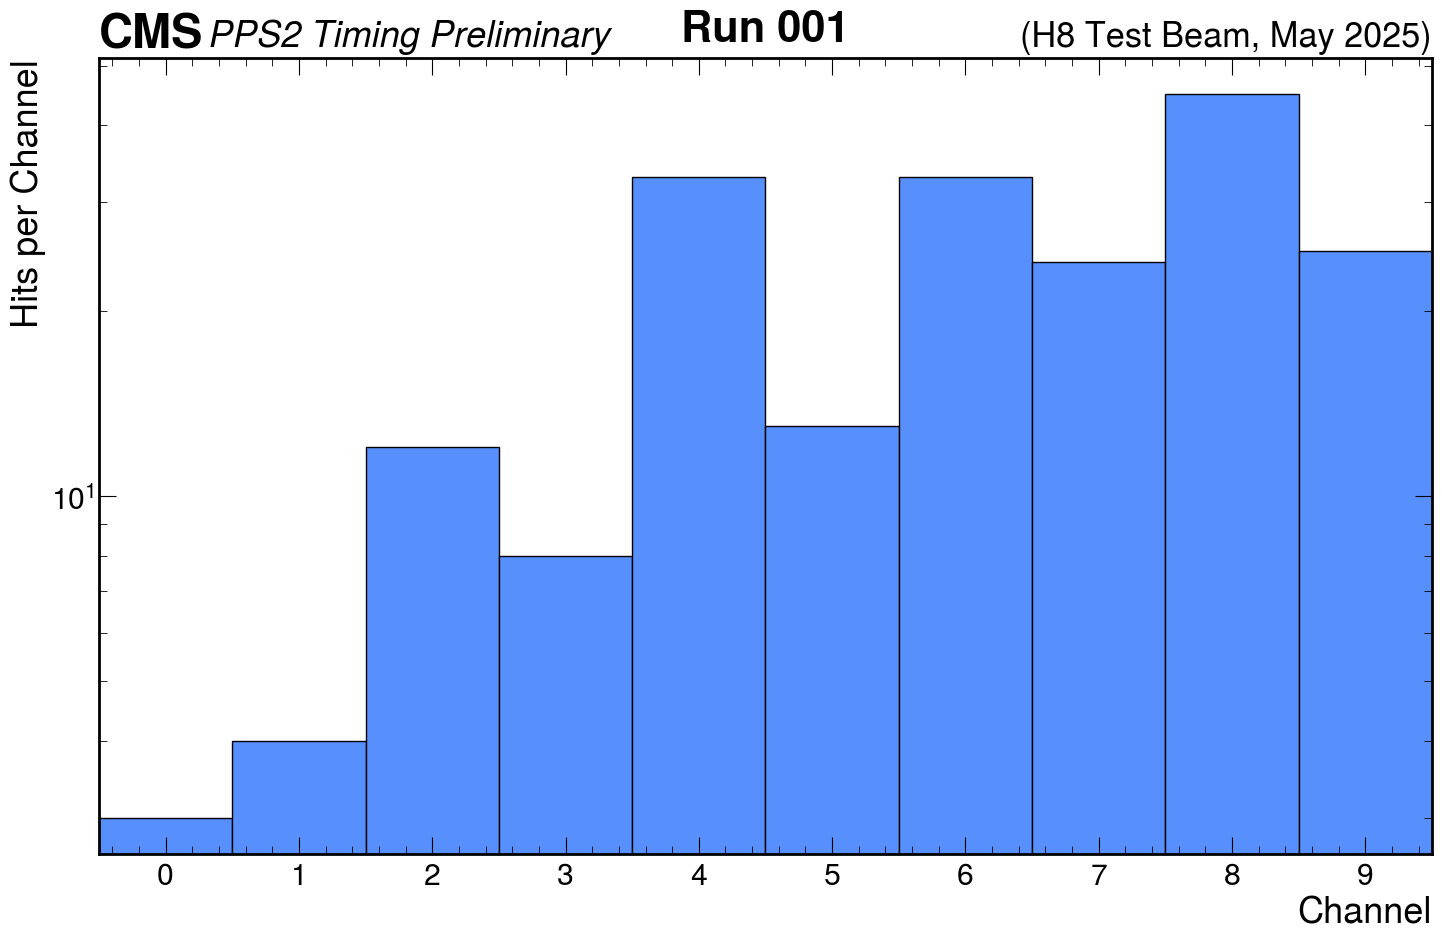

In [16]:
title = run_info.name
plot_channel_hits(hit_summary, 0, 9, cms_label="PPS2 Timing Preliminary", rlabel="(H8 Test Beam, May 2025)", log_y=True, figsize = (15, 10), title=title)

## LGAD Mapping specific

In [17]:
from sampiclyser.sensor_hitmaps import plot_hitmap

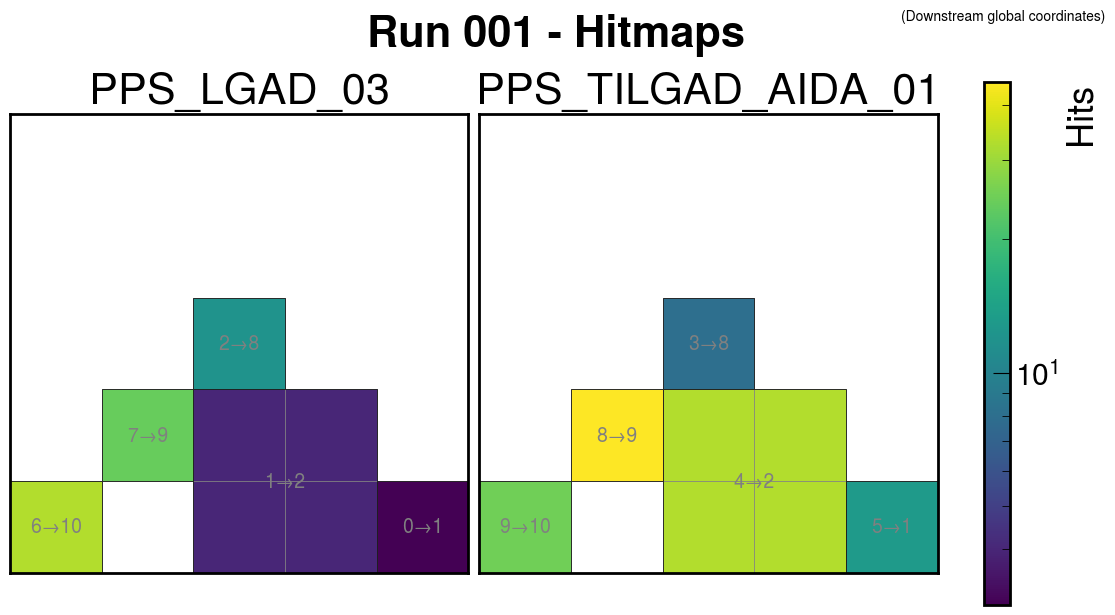

In [18]:
plot_title = run_info.name + " - Hitmaps"

board_spec = [config_info.board_spec[board] for board in config_info.board_order]

fig = plot_hitmap(
    hit_summary,
    specs=board_spec,
    layout=(1, 2),
    figsize=(11,6),
    log_z = True,
    title = plot_title,
    do_sampic_ch = True,
    do_board_ch= True,
    coordinates="global",
)